In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import numpy as np
warnings.filterwarnings('ignore')

In [3]:
insta_df = pd.read_csv('../data/Instagram_accounts.csv')

# Ranking Instagram Accounts
 - The previous notebook `All_Accounts` looked at general data across all 29 Instagram accounts. This notebook will rank the 29 accounts by like and comment data and then take a deeper look at the top 10 accounts.

In [4]:
insta_df['likeCount']=pd.to_numeric(insta_df["likeCount"],errors="coerce")

In [5]:
cols_to_use = ['description', 'commentCount', 'likeCount', 'pubDate', 'username']
insta_df=insta_df.drop_duplicates(subset=cols_to_use)

In [6]:
insta_df = insta_df.set_index(pd.to_datetime(insta_df['pubDate'], errors = 'coerce'))
insta_df.index

DatetimeIndex(['2020-11-15 21:43:08+00:00', '2020-11-15 13:54:38+00:00',
               '2020-11-14 01:18:39+00:00', '2020-11-13 00:17:50+00:00',
               '2020-11-12 00:07:21+00:00', '2020-11-11 02:44:23+00:00',
               '2020-11-10 16:52:10+00:00', '2020-11-09 23:36:42+00:00',
               '2020-11-09 17:22:12+00:00', '2020-11-09 00:29:39+00:00',
               ...
               '2016-04-09 21:22:42+00:00', '2016-04-08 21:25:24+00:00',
               '2016-04-07 21:54:18+00:00', '2016-04-07 06:58:01+00:00',
               '2016-04-06 21:44:35+00:00', '2016-04-05 20:45:15+00:00',
               '2016-04-04 20:10:56+00:00', '2016-04-04 13:12:09+00:00',
               '2016-04-03 21:33:12+00:00', '2016-04-03 00:11:26+00:00'],
              dtype='datetime64[ns, UTC]', name='pubDate', length=51110, freq=None)

In [7]:
insta_df.groupby('username')['likeCount'].mean().sort_values(ascending=False)

username
talinegabriel            9624.850829
minimalistbaker          9176.771735
chocolatecoveredkatie    8295.513057
pickuplimes              8162.828788
shutthekaleup            5892.396151
lonijane                 5611.230192
plantifullybased         5567.889776
rachlmansfield           5334.453344
maddielymburner          4954.541331
choosingchia             4576.950450
purelykaylie             4339.230648
the_buddhist_chef        3229.842239
mynewroots               3069.820144
georginaburgess_         1950.048747
sproutedkitchen          1909.865737
thedelicious             1594.192242
nomnompaleo              1558.968584
sweetpotatosoul          1503.739588
thecuriouschickpea       1412.018349
marie.reginato           1357.476252
lizmoody                 1103.983114
cleanfooddirtycity        989.706329
munchin.withmar           987.487329
joybauer                  961.712277
agipsyinthekitchen        497.797268
healthyliciousvegan       383.191641
agathaachindu             164

This data shows the average number of likes per post that each user gets: 
 - The top 5 are `talinegabriel`, `minimalistbaker`,`chocolatecoveredkatie`,`pickuplimes`, and `shutthekaleup`. 
 - The range of likes is 9,460 with `talinegabriel` being the popular and `agathaachindu` being the least popular

In [8]:
insta_df['commentCount']=pd.to_numeric(insta_df["commentCount"],errors="coerce")

In [9]:
insta_df.groupby('username')['commentCount'].mean().sort_values(ascending=False)

username
talinegabriel            221.828729
plantifullybased         188.167732
shutthekaleup            184.309102
minimalistbaker          183.002685
rachlmansfield           174.160692
munchin.withmar          169.070175
chocolatecoveredkatie    157.628264
choosingchia             136.539254
pickuplimes              127.006061
the_buddhist_chef         96.814249
purelykaylie              91.576619
lonijane                  91.047315
thecuriouschickpea        84.009174
maddielymburner           82.044355
mynewroots                77.697842
georginaburgess_          76.398329
lizmoody                  76.109756
nomnompaleo               64.814543
marie.reginato            44.177619
thedelicious              42.257928
sweetpotatosoul           39.689703
sproutedkitchen           39.347864
healthyliciousvegan       26.720693
joybauer                  24.760544
cleanfooddirtycity        24.680169
agipsyinthekitchen        18.965846
agathaachindu             11.951262
Name: commentCount,

This data shows the average number of comments per post that each user gets. 
 - The top 5 are `talinegabriel`, `plantifullybased`,`minimalistbaker`,`shutthekaleup` and `rachlmansfield`. 
 - The range of comments is 210. `talinegabriel` receives the most comments while `agathaachindu` receives the least.This is the exact same best and worst for like counts

It is notable that, three of the five top commented and liked accounts overlap. 
 - Top 5 comments:`talinegabriel`, `plantifullybased`,`minimalistbaker`,`shutthekaleup` and `rachlmansfield`. 
 - Top 5 likes: `talinegabriel`, `minimalistbaker`,`chocolatecoveredkatie`,`pickuplimes`, and `shutthekaleup`

There is a difference between liking and engaging (i.e. commenting) on a post. Going forward, I will look at the top five accounts based on likes and comments which equates to seven accounts. I will also include 'maddielymburner','muchin.withmar','purelykaylie' to have a total of ten "top" accounts. I chose these additional three accounts because they are in the top ten of like counts which mean they are also very popular. 

# Top 10 accounts
 - The rest of this notebook looks at the top ten most popular healthy food Instagram accounts based on likes and comments

In [10]:
top_usernames = ['talinegabriel','minimalistbaker','pickuplimes','rachlmansfield','shutthekaleup','chocolatecoveredkatie','maddielymburner','muchin.withmar','purelykaylie','plantifullybased']
top_filter = insta_df['username'].isin(top_usernames)

In [11]:
#munchin.withmar does not show up
topuser_df = insta_df[top_filter]
topuser_df ['username'].value_counts()

rachlmansfield           3933
shutthekaleup            3274
minimalistbaker          2979
purelykaylie             1266
maddielymburner           992
talinegabriel             724
pickuplimes               660
chocolatecoveredkatie     651
plantifullybased          626
Name: username, dtype: int64

These are the top ten accounts based on the like and comment data. This shows how many posts each account has. `Rachlmansfield` has posted the most, while `plantifullybased` has posted the least. It is very likely that `rachlmansfield` started her account before `plantifullybased`.

In [12]:
cols_to_use = ['description', 'commentCount', 'likeCount', 'pubDate', 'username']
topuser_df=topuser_df.drop_duplicates(subset=cols_to_use)

This step helped me clean the data and remove any duplicates that may have existed. 

In [13]:
topuser_df = topuser_df.set_index(pd.to_datetime(topuser_df['pubDate']))
topuser_df.index

DatetimeIndex(['2020-10-07 16:10:21+00:00', '2020-09-28 18:39:12+00:00',
               '2020-09-26 17:42:04+00:00', '2020-09-21 17:12:55+00:00',
               '2020-08-24 17:52:03+00:00', '2020-08-18 15:06:05+00:00',
               '2020-08-17 19:32:29+00:00', '2020-08-13 16:45:23+00:00',
               '2020-07-15 16:32:20+00:00', '2020-07-06 18:57:38+00:00',
               ...
               '2016-04-09 21:22:42+00:00', '2016-04-08 21:25:24+00:00',
               '2016-04-07 21:54:18+00:00', '2016-04-07 06:58:01+00:00',
               '2016-04-06 21:44:35+00:00', '2016-04-05 20:45:15+00:00',
               '2016-04-04 20:10:56+00:00', '2016-04-04 13:12:09+00:00',
               '2016-04-03 21:33:12+00:00', '2016-04-03 00:11:26+00:00'],
              dtype='datetime64[ns, UTC]', name='pubDate', length=15105, freq=None)

The code above sets a date and time index so that the data can be plotted over time. 

# Number of Posts by Account

In [14]:
year_filter = topuser_df.index.year>2017

In [15]:
topuser_since2018_df = topuser_df[year_filter]

Text(0.5, 1.0, 'Average Number of Posts Grouped by Month for the Most Popular Accounts Since 2018')

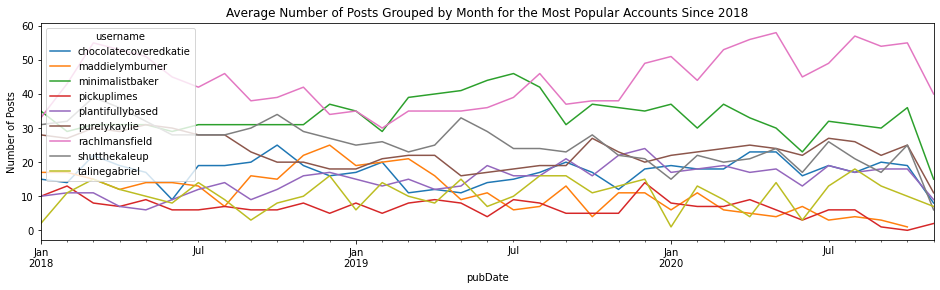

In [16]:
topuser_since2018_df.groupby('username').resample('M')['username'].size().unstack(0).plot(kind='line', figsize=(16,4))
plt.ylabel('Number of Posts')
plt.title('Average Number of Posts Grouped by Month for the Most Popular Accounts Since 2018')

This shows all accounts and how often they have posted since 2018. There are no clear conclusions we can draw, but the number of posts per week seems to be very variable. We see a slight climb for posts by `rachlmansfield` in January 2020. However, no other accounts experience this. Therefore, it is more likely something rachl is doing, rather than a result of quarantine. 

Text(0.5, 1.0, 'Average Number of Posts Grouped by Week for the Most Popular Accounts Since 2018')

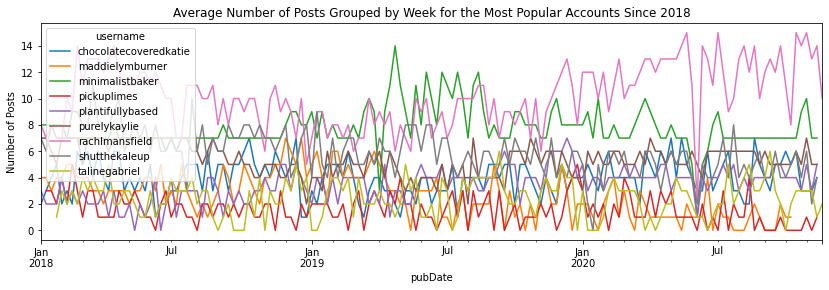

In [17]:
topuser_since2018_df.groupby('username').resample('W')['username'].size().unstack(0).plot(figsize=(14,4))
plt.ylabel('Number of Posts')
plt.title('Average Number of Posts Grouped by Week for the Most Popular Accounts Since 2018')

This graph is a "zoomed" in version of the graph above. It shows average likes for each account since 2019 on a weekly basis. Unfortunately, it is incredibly busy and shows no real trends. There are two notes I will take from this. First, it looks like `talinegabriel` is the youngest account as it started in 2019. Second, the drastic decrease in all account activity in June 2020 is when the "Black Lives Matter" Movement hit social media. As this time, all accounts halted usual activity. This shows that using social media to address social and political issues can be incredibly powerful. It might be easier to interpret data by looking at average likes on a weekly basis in a table.

# Account Likes Analysis

Text(0.5, 1.0, 'Average Number of Likes for the Most Popular Accounts Since 2018')

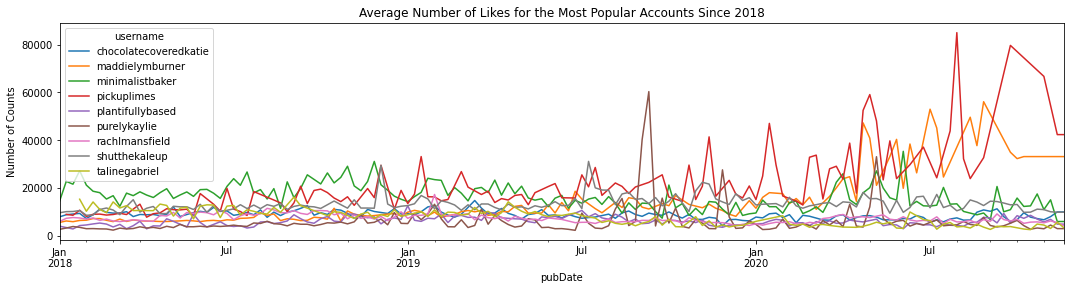

In [18]:
topuser_byweek = topuser_since2018_df.groupby('username').resample('W')
topuser_avglikes_byweek = topuser_byweek['likeCount'].mean()
topuser_avglikes_byweek_df = topuser_avglikes_byweek.unstack(0).interpolate()
topuser_avglikes_byweek_df.plot(figsize=(18,4))
plt.ylabel('Number of Counts')
plt.title('Average Number of Likes for the Most Popular Accounts Since 2018')

This graph shows average likes on a weekly basis starting in 2018. Each account has a different colored line as listed in the key. The like count peaks spikes very often, but it looks like there was a significant increase on average for `maddielymburner` and `pickuplimes` in 2020. It is unclear this is due to quarantine or an increased interest in healthy accounts. However, because other accounts did not also see a significant increase, it is possible that there two accounts are just an anomaly. 

In [19]:
year_filter = topuser_df.index.year>2017
topuser_since2018_df = topuser_df[year_filter]

In [20]:
likes_since2018_mean = topuser_since2018_df.groupby([topuser_since2018_df.index.year, 'username'])['likeCount'].mean()
likes_since2018_mean

pubDate  username             
2018     chocolatecoveredkatie     9431.322430
         maddielymburner           7195.272727
         minimalistbaker          19655.156085
         pickuplimes              12166.373626
         plantifullybased          5566.947761
         purelykaylie              4159.125000
         rachlmansfield            8216.080614
         shutthekaleup            11735.109626
         talinegabriel            10448.762712
2019     chocolatecoveredkatie     8660.385870
         maddielymburner          10701.310811
         minimalistbaker          15025.578022
         pickuplimes              19154.659091
         plantifullybased          6601.440594
         purelykaylie              7811.090909
         rachlmansfield            6674.532009
         shutthekaleup            14446.676568
         talinegabriel             6973.411348
2020     chocolatecoveredkatie     7738.410000
         maddielymburner          25845.680000
         minimalistbaker     

This table shows the average like count per user in every year since 2018. It might be easier to interpret in a graph.

Text(0.5, 1.0, 'Average Likes per Year by Account')

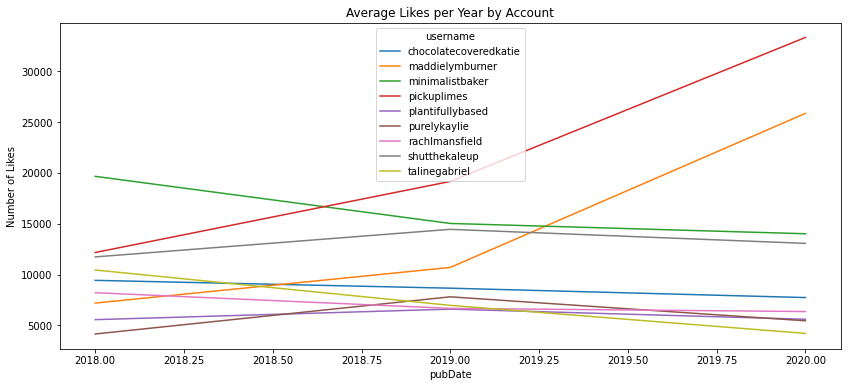

In [21]:
likes_since2018_mean.unstack().plot(figsize = (14,6))
plt.ylabel('Number of Likes')
plt.title('Average Likes per Year by Account')

This shows average likes per year for each account since 2018.
 - `chocolatecoveredkatie`: slightly decreasing in average likes over the past three years 
 - `maddielymburner`: increasing in average likes over the past three years  
 - `minimalistbaker`: decreasing in average likes over the past three years 
 - `pickuplimes`: clearly increasing in the average likes over the past three years 
 - `plantifullybased`: remains fairly stagnant over the past three years
 - `purelykaylie`: no clear increase or decreasing trend 
 - `rachlmansfield`: slight decrease in average likes over the past three years
 - `shutthekaleup`: slight increase in likes going into 2019 and then a decrease into 2020 
 - `talinegabriel`: average likes decreasing over the past three years

In [22]:
insta_date_df = insta_df.set_index(pd.to_datetime(insta_df['pubDate'], errors='coerce'))

In [23]:
topuser_since2018_df.groupby(topuser_since2018_df.index.dayofweek)['likeCount'].mean()

pubDate
0     9921.929412
1     9828.075648
2    10285.142562
3     9919.572775
4    10259.237402
5    10518.688050
6    10123.837045
Name: likeCount, dtype: float64

This shows average total likes since 2018 across the most popular accounts during each day of the week. The goal of this is to see if there is a "good" day of the week. The reason I chose to look only at posts since 2018 is because popularity for these accounts really started after 2017. This chart helps to answer the question: Will I get more likes if I post on a Sunday rather than a Tuesday? In this data, 0 represents Sunday and 6 represents Saturday. It appears that Monday gets the fewest likes while Friday gets the most likes. However, this is a very small sample size, so we cannot make any sweeping conclusions. 

# Account Comment Analysis 

Text(0.5, 1.0, 'Average Number of Comments for the Most Popular Accounts Since 2018')

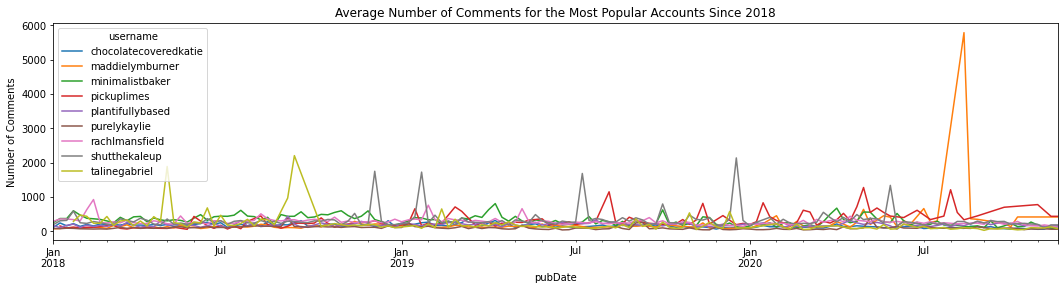

In [25]:
topuser_byweek = topuser_since2018_df.groupby('username').resample('W')
topuser_avgcomments_byweek = topuser_byweek['commentCount'].mean()
topuser_avgcomments_byweek_df = topuser_avgcomments_byweek.unstack(0).interpolate()
topuser_avgcomments_byweek_df.plot(figsize=(18,4))
plt.ylabel('Number of Comments')
plt.title('Average Number of Comments for the Most Popular Accounts Since 2018')

This shows all average comments only a weekly basis since 2019. Each account has a different colored line. Similar to the like count graphs, this is a difficult graph to interpret. However, for some reason, `talinegabriel` has odd spikes in 2018, `shutthekaleup` has spikes in 2019 and `maddielymburner` has one large spike in August of 2020. 

In [26]:
comments_since2018_mean = topuser_since2018_df.groupby([topuser_since2018_df.index.year, 'username'])['commentCount'].mean()
comments_since2018_mean

pubDate  username             
2018     chocolatecoveredkatie    190.266355
         maddielymburner          145.438503
         minimalistbaker          396.769841
         pickuplimes              161.362637
         plantifullybased         185.932836
         purelykaylie             118.304487
         rachlmansfield           312.168906
         shutthekaleup            294.024064
         talinegabriel            341.084746
2019     chocolatecoveredkatie    167.358696
         maddielymburner          146.094595
         minimalistbaker          303.876923
         pickuplimes              320.386364
         plantifullybased         207.267327
         purelykaylie              94.462810
         rachlmansfield           277.649007
         shutthekaleup            387.115512
         talinegabriel            174.971631
2020     chocolatecoveredkatie    121.410000
         maddielymburner          364.640000
         minimalistbaker          246.446108
         pickuplimes    

This table shows the average comment count per user in every year since 2018. It might be easier to interpret in a graph.

<AxesSubplot:xlabel='pubDate'>

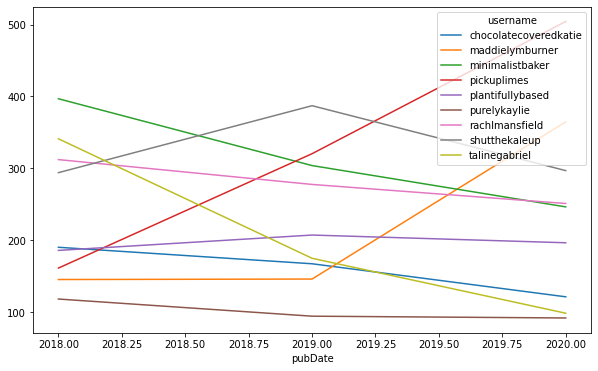

In [28]:
comments_since2018_mean.unstack().plot(figsize = (10,6))

This shows average comments per year for each account since 2018.
 - `chocolatecoveredkatie`: slight decrease in average comments since 2018
 - `maddielymburner`: increase in comments starting in 2019 
 - `minimalistbaker`: slight decrease in comments since 2018
 - `pickuplimes`: clearly increasing in comments since 2018
 - `plantifullybased`: comments seem to remain fairly stagnant
 - `purelykaylie`: slight decrease from 2019 to 2018 and then fairly stagnant  
 - `rachlmansfield`: slight decrease in comments since 2018
 - `shutthekaleup`: comments increase from 2018 to 2019 and then decrease from 2019 to 2020
 - `talinegabriel`: comments are decreasing over the past three years

In [33]:
topuser_since2018_df.groupby(topuser_since2018_df.index.dayofweek)['commentCount'].mean()

pubDate
0    261.758289
1    241.945078
2    259.318182
3    260.843979
4    239.001120
5    221.152201
6    220.302632
Name: commentCount, dtype: float64

This shows average total average comments since 2018 across the most popular accounts during each day of the week. The goal of this is to see if there is a "good" day of the week for comments. In other words, this answers the question: Will I get more comments if I post on a Sunday rather than a Tuesday? In this data, 0 represents Sunday and 6 represents Saturday. It appears that Saturday gets the fewest comments while Sunday gets the most comments.